In [1]:
import pandas as pd
import seaborn as sns

Cleaning of merged weather and trips files followed by feature creation for modelling.

In [2]:
df = pd.read_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/merged_weather_trips.csv', parse_dates=['DAYOFSERVICE'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890821 entries, 0 to 1890820
Data columns (total 27 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DAYOFSERVICE         datetime64[ns]
 1   TRIPID               int64         
 2   LINEID               object        
 3   ROUTEID              object        
 4   DIRECTION            int64         
 5   PLANNEDTIME_ARR      float64       
 6   PLANNEDTIME_DEP      float64       
 7   ACTUALTIME_ARR       float64       
 8   ACTUALTIME_DEP       float64       
 9   HOUR                 int64         
 10  temp                 float64       
 11  dew_point            float64       
 12  feels_like           float64       
 13  temp_min             float64       
 14  temp_max             float64       
 15  pressure             int64         
 16  humidity             int64         
 17  wind_speed           float64       
 18  wind_deg             int64         
 19  rain_1h              

In [4]:
df['TRIPTIME'] = df['ACTUALTIME_ARR']-df['ACTUALTIME_DEP']

Create weekday column

In [5]:
# create weekday column
df['WEEKDAY'] = df['DAYOFSERVICE'].dt.weekday

In [6]:
df['DAYOFSERVICE'].unique()

array(['2018-02-07T00:00:00.000000000', '2018-02-18T00:00:00.000000000',
       '2018-03-16T00:00:00.000000000', '2018-03-27T00:00:00.000000000',
       '2018-03-11T00:00:00.000000000', '2018-09-28T00:00:00.000000000',
       '2018-09-26T00:00:00.000000000', '2018-06-26T00:00:00.000000000',
       '2018-06-21T00:00:00.000000000', '2018-10-10T00:00:00.000000000',
       '2018-10-11T00:00:00.000000000', '2018-04-11T00:00:00.000000000',
       '2018-03-10T00:00:00.000000000', '2018-09-20T00:00:00.000000000',
       '2018-09-29T00:00:00.000000000', '2018-06-22T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000', '2018-07-07T00:00:00.000000000',
       '2018-07-08T00:00:00.000000000', '2018-09-24T00:00:00.000000000',
       '2018-12-02T00:00:00.000000000', '2018-07-09T00:00:00.000000000',
       '2018-06-15T00:00:00.000000000', '2018-10-16T00:00:00.000000000',
       '2018-04-10T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
       '2018-04-12T00:00:00.000000000', '2018-12-30

In [7]:
df['WEEKDAY'].unique()

array([2, 6, 4, 1, 3, 5, 0])

Create month column

In [8]:
df['MONTH'] = df['DAYOFSERVICE'].dt.month
df['MONTH'].unique()

array([ 2,  3,  9,  6, 10,  4, 12,  7,  1,  5,  8, 11])

In [9]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,HOUR,...,snow_1h,clouds_all,weather_id,weather_main,weather_description,snow_ice,heavy_precip,TRIPTIME,WEEKDAY,MONTH
0,2018-02-07,6253783,68,68_80,1,87245.0,84600.0,87524.0,84600.0,23,...,0.0,75,300,Drizzle,light intensity drizzle,0,0,2924.0,2,2
1,2018-02-07,6259641,59,59_10,1,84864.0,84000.0,84890.0,84076.0,23,...,0.0,75,300,Drizzle,light intensity drizzle,0,0,814.0,2,2
2,2018-02-07,6255896,130,130_11,2,83706.0,82500.0,84193.0,82852.0,23,...,0.0,75,300,Drizzle,light intensity drizzle,0,0,1341.0,2,2
3,2018-02-07,6261627,1,1_41,2,85557.0,84600.0,85866.0,84628.0,23,...,0.0,75,300,Drizzle,light intensity drizzle,0,0,1238.0,2,2
4,2018-02-07,6248587,45A,45A_64,2,86338.0,84000.0,86283.0,84005.0,23,...,0.0,75,300,Drizzle,light intensity drizzle,0,0,2278.0,2,2


Create rushhour column with values 0 (hours outside of rushour) and 1 (values inside rushhour i.e., hour value of 6-9 and 15-18)

In [10]:
df['HOUR'].unique()

array([23,  8, 15, 22, 10, 13, 11, 16,  9, 19, 12,  6, 17,  5, 18, 14, 20,
        7, 21,  0,  4,  2])

In [11]:
# code from https://stackoverflow.com/questions/70755998/dataframe-isin-for-integers
df_weekdays = df.loc[df['WEEKDAY'].isin([0,1,2,3,4])]
df_weekdays['WEEKDAY'].unique()

array([2, 4, 1, 3, 0])

<AxesSubplot:xlabel='HOUR', ylabel='TRIPTIME'>

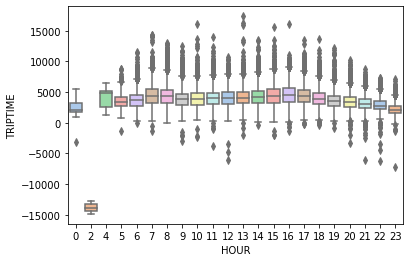

In [12]:
sns.boxplot(x=df_weekdays['HOUR'], y=df_weekdays['TRIPTIME'], palette='pastel')

In [13]:
df_weekdays.groupby('HOUR', as_index=False)['TRIPTIME'].mean()

,HOUR,TRIPTIME
0,0,2489.695775
1,2,-13832.500000
2,4,4123.655914
3,5,3479.256345
4,6,3662.278166
5,7,4276.533768
6,8,4298.730074
7,9,3835.159998
8,10,3851.762690
9,11,3950.782429


In [14]:
df_weekdays.groupby('HOUR', as_index=False)['TRIPTIME'].median()

,HOUR,TRIPTIME
0,0,2120.0
1,2,-13832.5
2,4,4821.0
3,5,3382.0
4,6,3640.0
5,7,4299.0
6,8,4330.0
7,9,3825.0
8,10,3876.0
9,11,3976.0


check that this does not apply to weekend days

In [15]:
df_weekend = df.loc[df['WEEKDAY'].isin([5,6])]

<AxesSubplot:xlabel='HOUR', ylabel='TRIPTIME'>

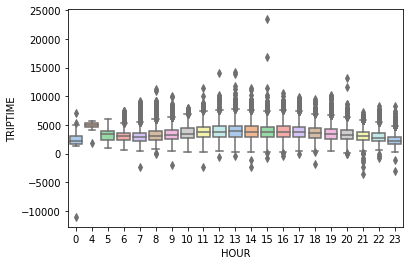

In [16]:
sns.boxplot(x=df_weekend['HOUR'], y=df_weekend['TRIPTIME'], palette='pastel')

Weekend days to not hold the same effect as weekdays.
Apply rushhour condition to create new feature

In [17]:
# code from https://stackoverflow.com/questions/70755998/dataframe-isin-for-integers

condition_rushhour = df['WEEKDAY'].isin([0,1,2,3,4]) & df['HOUR'].isin([7,8,15,16,17])
df['RUSHHOUR'] = (condition_rushhour).astype(int)

In [18]:
df

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,HOUR,...,clouds_all,weather_id,weather_main,weather_description,snow_ice,heavy_precip,TRIPTIME,WEEKDAY,MONTH,RUSHHOUR
0,2018-02-07,6253783,68,68_80,1,87245.0,84600.0,87524.0,84600.0,23,...,75,300,Drizzle,light intensity drizzle,0,0,2924.0,2,2,0
1,2018-02-07,6259641,59,59_10,1,84864.0,84000.0,84890.0,84076.0,23,...,75,300,Drizzle,light intensity drizzle,0,0,814.0,2,2,0
2,2018-02-07,6255896,130,130_11,2,83706.0,82500.0,84193.0,82852.0,23,...,75,300,Drizzle,light intensity drizzle,0,0,1341.0,2,2,0
3,2018-02-07,6261627,1,1_41,2,85557.0,84600.0,85866.0,84628.0,23,...,75,300,Drizzle,light intensity drizzle,0,0,1238.0,2,2,0
4,2018-02-07,6248587,45A,45A_64,2,86338.0,84000.0,86283.0,84005.0,23,...,75,300,Drizzle,light intensity drizzle,0,0,2278.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890816,2018-05-27,6845502,68,68_66,2,88740.0,87000.0,89070.0,87535.0,0,...,40,802,Clouds,scattered clouds,0,0,1535.0,6,5,0
1890817,2018-05-27,6840975,66,66_17,1,28980.0,25500.0,28631.0,24393.0,6,...,75,520,Rain,light intensity shower rain,0,0,4238.0,6,5,0
1890818,2018-05-15,6767648,65,65_75,2,90847.0,87300.0,90702.0,87197.0,0,...,75,803,Clouds,broken clouds,0,0,3505.0,1,5,0
1890819,2018-05-15,6761211,68,68_66,2,89100.0,87300.0,88575.0,87247.0,0,...,75,803,Clouds,broken clouds,0,0,1328.0,1,5,0


#### Drop unnecessary columns
We can now drop the following columns from the dataframe as they provide no additional information or the information required has been extracted from them.
* DAYOFSERVICE
* ACTUALTIME_ARR
* ACTUALTIME_DEP

In [19]:
# drop unnecessary columns
df.drop(columns=['DAYOFSERVICE','ACTUALTIME_ARR','ACTUALTIME_DEP'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890821 entries, 0 to 1890820
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TRIPID               int64  
 1   LINEID               object 
 2   ROUTEID              object 
 3   DIRECTION            int64  
 4   PLANNEDTIME_ARR      float64
 5   PLANNEDTIME_DEP      float64
 6   HOUR                 int64  
 7   temp                 float64
 8   dew_point            float64
 9   feels_like           float64
 10  temp_min             float64
 11  temp_max             float64
 12  pressure             int64  
 13  humidity             int64  
 14  wind_speed           float64
 15  wind_deg             int64  
 16  rain_1h              float64
 17  snow_1h              float64
 18  clouds_all           int64  
 19  weather_id           int64  
 20  weather_main         object 
 21  weather_description  object 
 22  snow_ice             int64  
 23  heavy_precip         int64  
 24

## Review and prep

In [21]:
df.isna().sum()

TRIPID                 0
LINEID                 0
ROUTEID                0
DIRECTION              0
PLANNEDTIME_ARR        0
PLANNEDTIME_DEP        0
HOUR                   0
temp                   0
dew_point              0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
snow_1h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
snow_ice               0
heavy_precip           0
TRIPTIME               0
WEEKDAY                0
MONTH                  0
RUSHHOUR               0
dtype: int64

In [22]:
df.dtypes

TRIPID                   int64
LINEID                  object
ROUTEID                 object
DIRECTION                int64
PLANNEDTIME_ARR        float64
PLANNEDTIME_DEP        float64
HOUR                     int64
temp                   float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
snow_ice                 int64
heavy_precip             int64
TRIPTIME               float64
WEEKDAY                  int64
MONTH                    int64
RUSHHOUR                 int64
dtype: object

In [23]:
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols = categorical_cols.append(df[['weather_id','snow_ice','heavy_precip','HOUR','TRIPID', 'DIRECTION', 'WEEKDAY', 'MONTH', 'RUSHHOUR']].columns)
# convert columns in the list to categorical columns
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.dtypes

TRIPID                 category
LINEID                 category
ROUTEID                category
DIRECTION              category
PLANNEDTIME_ARR         float64
PLANNEDTIME_DEP         float64
HOUR                   category
temp                    float64
dew_point               float64
feels_like              float64
temp_min                float64
temp_max                float64
pressure                  int64
humidity                  int64
wind_speed              float64
wind_deg                  int64
rain_1h                 float64
snow_1h                 float64
clouds_all                int64
weather_id             category
weather_main           category
weather_description    category
snow_ice               category
heavy_precip           category
TRIPTIME                float64
WEEKDAY                category
MONTH                  category
RUSHHOUR               category
dtype: object

In [24]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
PLANNEDTIME_ARR,1890821.0,54842.501246,17281.094194,18203.00,39659.00,54852.00,68672.00,91680.00
PLANNEDTIME_DEP,1890821.0,51322.906938,17431.484849,16200.00,36000.00,51300.00,64800.00,87600.00
temp,1890821.0,11.366764,5.554128,-4.61,7.39,11.39,15.39,26.39
dew_point,1890821.0,7.163524,4.636642,-7.99,3.93,7.33,10.37,19.36
feels_like,1890821.0,9.615109,6.984764,-10.61,3.90,10.31,15.02,26.39
temp_min,1890821.0,11.089952,5.589389,-4.63,7.26,10.53,15.37,26.37
temp_max,1890821.0,11.937974,5.674528,-3.43,7.57,11.57,16.41,27.57
pressure,1890821.0,1012.586343,11.710809,979.00,1005.00,1014.00,1021.00,1041.00
humidity,1890821.0,76.753792,13.572907,25.00,67.00,77.00,87.00,100.00
wind_speed,1890821.0,5.334887,2.671296,0.00,3.60,5.10,6.70,18.50


In [25]:
continuous_cols = df.select_dtypes(['float64', 'int64']).columns

In [26]:
df.duplicated().value_counts()

False    1890821
dtype: int64

In [27]:
df.nunique()

TRIPID                 611902
LINEID                    130
ROUTEID                   585
DIRECTION                   2
PLANNEDTIME_ARR         64305
PLANNEDTIME_DEP           791
HOUR                       22
temp                      422
dew_point                 779
feels_like               1001
temp_min                  234
temp_max                  327
pressure                   63
humidity                   73
wind_speed                 85
wind_deg                  153
rain_1h                   176
snow_1h                    23
clouds_all                 17
weather_id                 22
weather_main                9
weather_description        23
snow_ice                    2
heavy_precip                2
TRIPTIME                 9460
WEEKDAY                     7
MONTH                      12
RUSHHOUR                    2
dtype: int64

In [28]:
# check logical integrity of data
# Check for negative triptimes
negative_triptimes = list(df[df['TRIPTIME']<0]['TRIPID'])
len(negative_triptimes)

103

In [29]:
df = df.drop(df[df['TRIPTIME']<0].index)

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890718 entries, 0 to 1890717
Data columns (total 28 columns):
 #   Column               Dtype   
---  ------               -----   
 0   TRIPID               category
 1   LINEID               category
 2   ROUTEID              category
 3   DIRECTION            category
 4   PLANNEDTIME_ARR      float64 
 5   PLANNEDTIME_DEP      float64 
 6   HOUR                 category
 7   temp                 float64 
 8   dew_point            float64 
 9   feels_like           float64 
 10  temp_min             float64 
 11  temp_max             float64 
 12  pressure             int64   
 13  humidity             int64   
 14  wind_speed           float64 
 15  wind_deg             int64   
 16  rain_1h              float64 
 17  snow_1h              float64 
 18  clouds_all           int64   
 19  weather_id           category
 20  weather_main         category
 21  weather_description  category
 22  snow_ice             category
 23  heavy_p

In [32]:
df.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/cleaned_merged_weather_trips.csv', index=False)